In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics
%matplotlib inline


plt.style.use('ggplot')#to style the plots

# Exploring the Data 

In [4]:
# READ the DATA
arrest_df = pd.read_csv('UsArrests.csv', delimiter=',', index_col='City', header=0)
arrest_df.index.names = ['State'] # I have renamed the set index to "State" because we are looking at 50 united states.
arrest_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Looking at the boxplots below we can see that there is some outliers in the 'Rape' variable, however it isn't an extreme outlier
as such so there is no need for concern.
It is important to note that a scaling technique called standardization is going to be used later.

# Boxplots

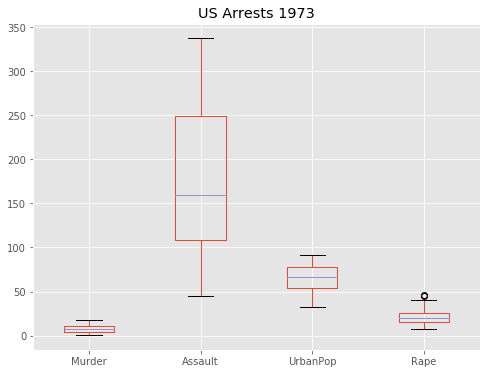

In [5]:
arrest_df.boxplot(figsize=(8,6));
plt.title('US Arrests 1973');

In [6]:
arrest_df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [7]:
arrest_df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

# Describing the Data

In [8]:
table = arrest_df.describe()
ninety_table = table.transpose()
ninety_table.to_csv('sum_table.csv')
ninety_table

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Looking at the data we can see that total obeservations per variable is evenly distributed all variables have a count of 50 each
The assault variables stands out the most as we can see  from the describe table it has athe highest mean of 170.760,
this means on average there is 171 cases per 100 000 arrests in the US. It's standard deviation points out that the largest
variance exists in this variable this is shown by the score of 83.37.

On a positive the note the murder variable has the lowest presence with approximatly 8 cases per 100 000 arrests.

The the 'Rape' variable sits at 22 cases per 100 000 on average with a minimum of 7.3 and a maximum of 46 per 100 000 arrests.

The variable 'UrbanPop' shows the percentage of the population in Urban areas and hence it it cannot be compared
 to the other 3 variables but will rather explore its correlation to these variables.

# Histograms

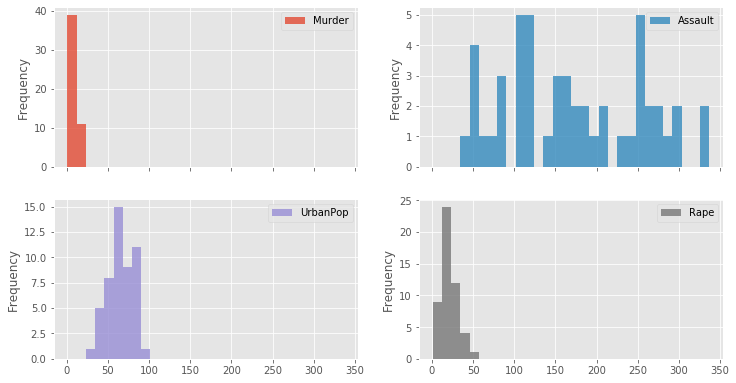

In [9]:
# histograms
arrest_df.plot(kind='hist',alpha=0.8,bins = 30, subplots=True, layout=(3,2), legend=True, figsize=(12,10));

# Bivariate Plot

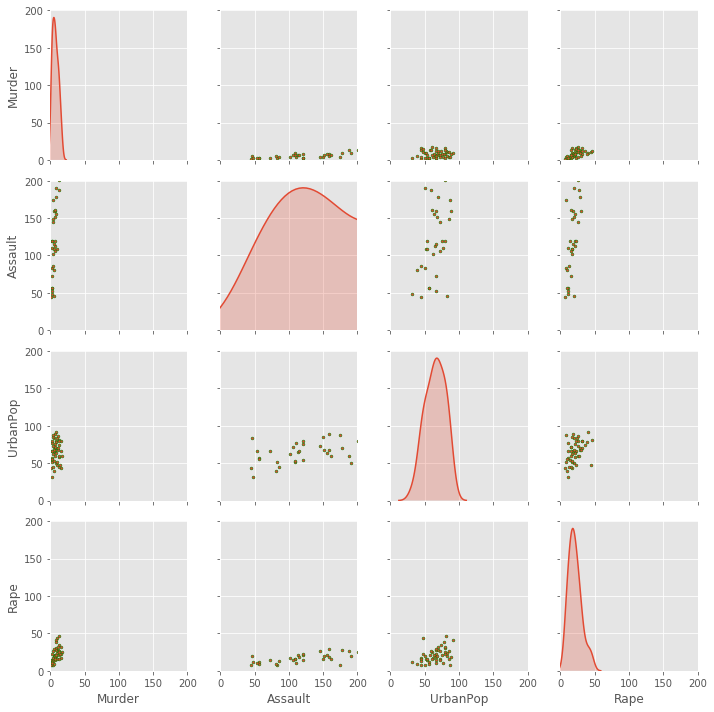

In [10]:
# Bivariate Plot
g_plt = sns.pairplot(arrest_df, diag_kind="kde", markers="o",
                 plot_kws=dict(s=8, edgecolor="g",
                               linewidth=0.5), diag_kws=dict(shade=True));
g_plt.set(ylim=(0, 200));
g_plt.set(xlim=(0, 200));

# Dealing with Missing Values

In [11]:
arrest_df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

As we can see there are no missing values, so there is no need for imputation of any kind. This is a nice clean dataset.

# Correlation Analysis

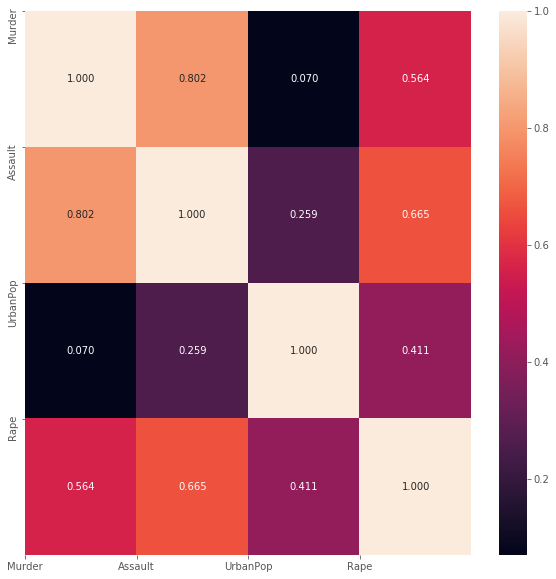

In [12]:
#unscaled
corr = arrest_df.corr()
plt.figure(figsize=(10,10));
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".3f");
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns);
# show plot

By studying the correlation plot abovce we can see that only positive correlations exist with the highest correlation occuring
between the variables of assault and murder with 0.802, which makes sense given that assaults lead to murder.
We can observe the relatively high positive correlations between assault and rape(0.665) as well as the murder and rape(0.564) variables.

To reduce the dimensionality of this dataset we will apply principle component analysis, this also aids in finding the underlying
variables that best constitute to our observations direction and spread.

# Explaining Cumulative Variance

In order to establish how many components we will need to accurately represent the data we have in all the variables we
will first need to explain cumulative variance

By examining the Cumulative variance explained curve below it is clear that we need three principle components to describe 100%
of the data in the datset. However using two components will be sufficient as we will cover at least 95% of the data and this will 
also reduce dimensionality and make visualisation easier.

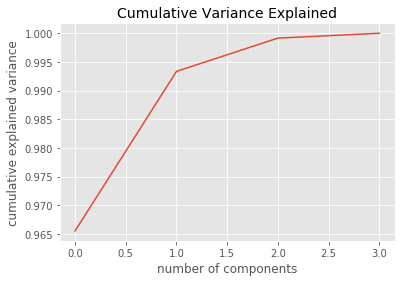

In [13]:
# fit the data to a pca instance
pca3 = PCA().fit(arrest_df.values);
plt.plot(np.cumsum(pca3.explained_variance_ratio_));
plt.title("Cumulative Variance Explained", fontsize = 14);
plt.xlabel('number of components');
plt.ylabel('cumulative explained variance');

In this study both standardized and non-standardized data options will be explored for principle component analysis

# Principle Component analysis: Non-Standardized

Transformed Data Frame

In [14]:
# unscaled
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(arrest_df)
# transform the components into a pandas data frame
principalDf = pd.DataFrame(data=principalComponents, columns=['PC 1', 'PC 2'])
principalDf.index = arrest_df.index
principalDf.head()

,PC 1,PC 2
State,,
Alabama,64.802164,11.448007
Alaska,92.827450,17.982943
Arizona,124.068216,-8.830403
Arkansas,18.340035,16.703911
California,107.422953,-22.520070


Looking at the table above we can see that the values have changed even though the data has not been standardized. The main
purpose of principle component analysis is to reduce dimensionality by combining the most important aspects of all the
variables into the amount of variables determined in the cumulative variance explained.

Describing the New Data Frame

In [15]:
principalDf.describe()

,PC 1,PC 2
count,5.000000e+01,5.000000e+01
mean,1.524114e-14,4.938272e-15
std,8.373240e+01,1.421240e+01
min,-1.274956e+02,-2.429121e+01
25%,-6.245852e+01,-1.170149e+01
50%,-1.098298e+01,-2.100031e+00
75%,7.881348e+01,9.500174e+00
max,1.652444e+02,3.109662e+01


By observing the new data frame we can see that all statistical measures have taken on a different shape than before in
terms of value. The variances have been greatly reduced, this is to be expected as it is one of the outcomes of PCA. Principle 
component analysis removes all the data along the least important principle axes and retains the data with the greatest variance

Among these the variance is expected not to be great as they are all in the high end of each of the variables' range. 
Depending on the data, the variance should not be high. If our dataset had variables containing extreme variance in 
terms of measurement between variables, then standardizing the data first would narrow down this problem. 
In this dataset we do not have such a great concern as three of our four variables are measured in the same way and have 
high positive correlations between each other.

# Non-Standardized Biplot

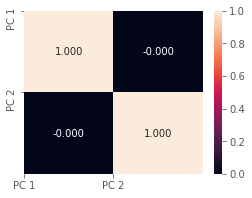

In [17]:
#unscaled
corr = principalDf.corr()
plt.figure(figsize=(4,3));
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".3f");
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns);
# show plot

In [18]:
def biplot(df):
    # Fit on 2 components
    pca = PCA(n_components=2, whiten=True).fit(df)

    # Plot transformed/projected data
    ax = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2']).plot(
        kind='scatter', x='PC1', y='PC2', figsize=(8, 8), color='g', s=8)
    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, linewidth=0.5, width=0.011, fc='r', ec='b')
        ax.annotate(df.columns[i], (pc1, pc2), size=13)
    return ax

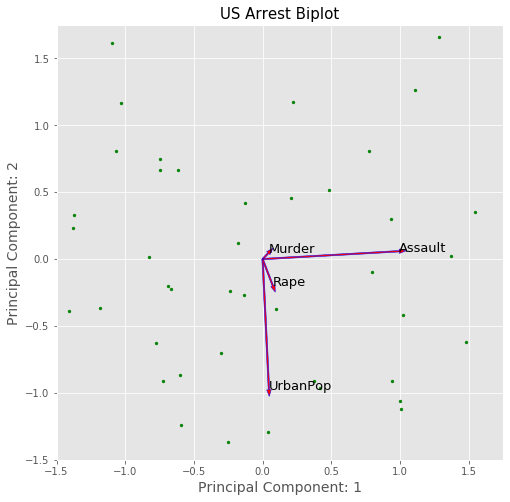

In [19]:
# unscaled
ax = biplot(arrest_df);
plt.title("US Arrest Biplot", fontsize=15);
plt.xlabel("Principal Component: 1", fontsize=14);
plt.ylabel("Principal Component: 2", fontsize=14);
ax.set_xlim([-1.5, 1.75]);
ax.set_ylim([-1.5, 1.75]);

In [20]:
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:, 0])
    yvector = components_[1] * max(transformed_features[:, 1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = {columns[i]: math.sqrt(
        xvector[i]**2 + yvector[i]**2) for i in range(num_columns)}
    important_features = sorted(
        zip(important_features.values(), important_features.keys()), reverse=True)
    #print ("Features by importance:\n", important_features)
    return(important_features)

# Visualizing Important Features

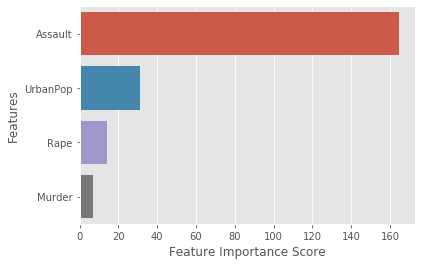

In [21]:
#unscaled
T = pca.fit_transform(arrest_df)
comp = get_important_features(
    T, pca.components_, arrest_df.columns[:].values)

dff = pd.DataFrame(comp, columns=['Importance', 'Variable'])


# Creating a bar plot
sns.barplot(x=dff.iloc[:, 0], y=dff.iloc[:, 1])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
#plt.title("Visualizing Important Features")
plt.show()

# Principle Component Analysis: Standardized

We will know conduct an analysis with standardized data, this is scaling all the variables so that they can be easily compared.

Transformed Standardized Data Frame

In [23]:
#scaled
# Separating out the features
X = arrest_df.iloc[:, :4]
X = StandardScaler().fit_transform(X)
corr_df = pd.DataFrame(data=X, index=arrest_df.index, columns=arrest_df.columns)

In [24]:
corr_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [25]:
%%capture
# scaled
corr = corr_df.corr();
plt.figure(figsize=(8,8))
# Generate Heat Map, allow annotations and place floats in map;
sns.heatmap(corr, annot=True, fmt=".3f");
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns);
# show plot

PCA on Standardized Data

In [26]:
# scaled
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(corr_df)
# transform the components into a pandas data frame
principalDf1 = pd.DataFrame(data=principalComponents1, columns=['PC 1', 'PC 2'])
principalDf1.index = arrest_df.index
principalDf1.head()

,PC 1,PC 2
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


Correlation Plot

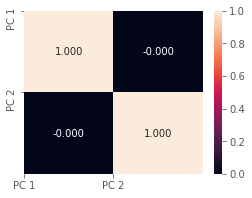

In [27]:
# scaled
corr1 = principalDf1.corr()
plt.figure(figsize=(4,3))
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr1, annot=True, fmt=".3f");
# Apply xticks
plt.xticks(range(len(corr1.columns)), corr1.columns);
# Apply yticks
plt.yticks(range(len(corr1.columns)), corr1.columns);
# show plot

Feature importance on standardized data paints a completely different picture to that of our findings of non-standardized data. 
Where 'Assault' was the most loaded variable, we now have 'UrbanPop' as the most loaded variable. Through standardization, 
which subtracts the mean from the datapoints first and then it divides the data by the standard deviation, all variables' 
unit variance lean towards 1 (We can see this in the standard deviation of the described table below). 
This brings our data to a place where we can see which variable is most important.


Visualising Feature Importance

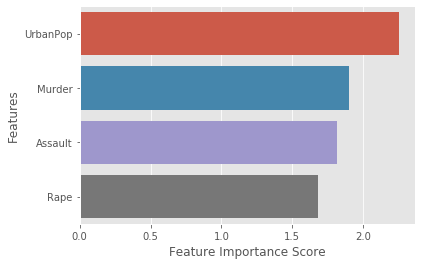

In [31]:
# Scaled
T_tr = pca.fit_transform(X)
comp = get_important_features(
    T_tr, pca.components_, arrest_df.columns[:].values)

dff = pd.DataFrame(comp, columns=['Importance', 'Variable'])


# Creating a bar plot
sns.barplot(x=dff.iloc[:, 0], y=dff.iloc[:, 1])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
#plt.title("Visualizing Important Features")
plt.show()

Features Described

In [32]:
corr_df.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-7.105427e-17,1.387779e-16,-4.396483e-16,8.593126e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


Biplot

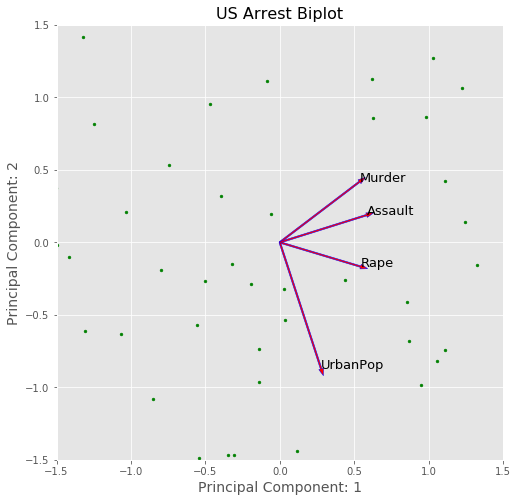

In [33]:
# scaled
ax = biplot(corr_df);
plt.title("US Arrest Biplot", fontsize = 16);
plt.xlabel("Principal Component: 1", fontsize = 14);
plt.ylabel("Principal Component: 2", fontsize = 14);
ax.set_xlim([-1.5, 1.5]);
ax.set_ylim([-1.5, 1.5]);

With our standardized data visualized in the biplot above, we find now that as with the feature importance plot, 
the variables have comparative nature and their importance in this dataset is almost equal.

# Cluster Analysis

In this section i will use hierarchical and k-means clustering for processing data.

Below are plots of various dendograms which will be used to help decide how many clusters to use in the analysis.



1. Dendogram

In [35]:
# function
def dendogram_plot(method):
    plt.figure(figsize=(9,6))
    plt.title("US Arrests Dendograms - " + method + " method")
    dend = shc.dendrogram(shc.linkage(corr_df, method=method))

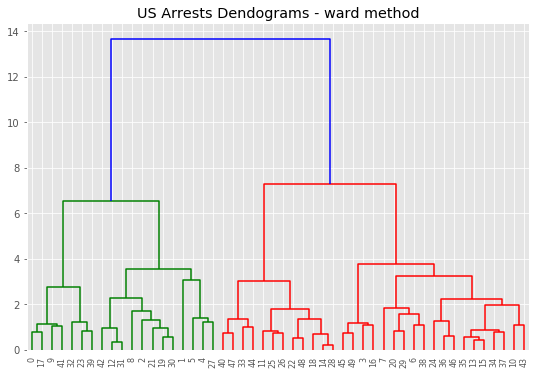

In [36]:
dendogram_plot('ward')

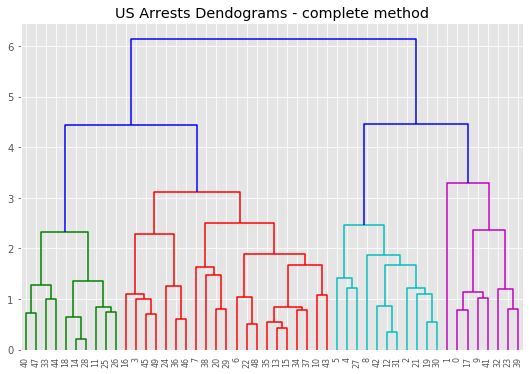

In [37]:
dendogram_plot('complete')

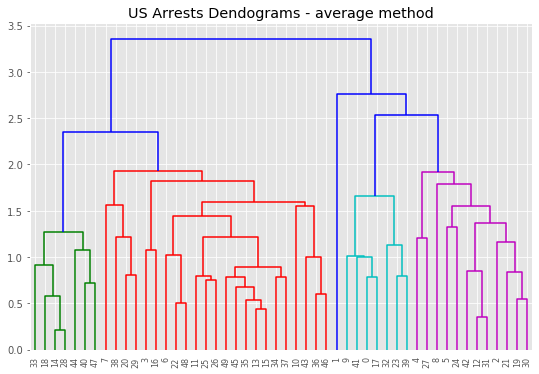

In [38]:
dendogram_plot('average')

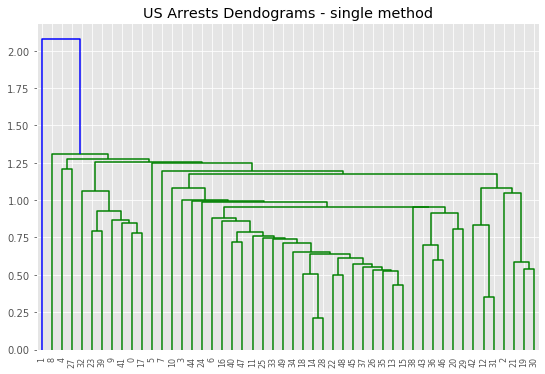

In [39]:
dendogram_plot('single')

Applying various methods (ward, single, complete and average) of measuring the distances between the datapoints we can see that method 'ward' produces the most evenly distributed clusters. Drawing a line through our highest linkage (blue in this case), we see that we have two perfectly formed clusters dividing further down into the relationships established by the method's algorithm.

In [40]:
def hierarchical_clustering(method, data, components):
    cluster = AgglomerativeClustering(
        n_clusters=2, affinity='euclidean', linkage=method);
    cluster.fit_predict(data);
    data['Cluster'] = cluster.labels_;
    print('Cluster Value Count:\n' + str(data['Cluster'].value_counts()));
    sns.lmplot(data=data, x='PC 1', y='PC 2', hue='Cluster',
               fit_reg=False, legend=True, legend_out=True, height=7);
    plt.title('US Arrests: ' + method + ' method with 2 clusters.');
    print(data);
    print('\nSilhouette Score: ' + str(metrics.silhouette_score(components,
                                                                cluster.labels_, metric='euclidean')));

# Hierarchical Clustering


I tried various methods in the hierarchical clustering technique algorithm. With two clusters giving us the best results as determined with our dendograms, all methods produced more or less the same clusters and Silhouette scores with the exception of maybe one or two states being grouped in a different cluster.
With hierarchical clustering, the algorithm groups together the states in a hierarchical manner based on the states relative distances. I have utilsed the Euclidean distance method here for measurement.
We can deduct from the states grouped together that one of the main components to the clustering together is the size of the state. Smaller states are grouped together and so are larger states. Smaller states account to 19 of the 50 states and the larger 31. This is because of the fact that even after scaling, smaller states would have lesser arrests than larger states as the arrests are measured per 100,000

1.Hierarchical Clustering

Cluster Value Count:
0    31
1    19
Name: Cluster, dtype: int64
                    PC 1      PC 2  Cluster
State                                      
Alabama         0.985566  1.133392        1
Alaska          1.950138  1.073213        1
Arizona         1.763164 -0.745957        1
Arkansas       -0.141420  1.119797        0
California      2.523980 -1.542934        1
Colorado        1.514563 -0.987555        1
Connecticut    -1.358647 -1.088928        0
Delaware        0.047709 -0.325359        0
Florida         3.013042  0.039229        1
Georgia         1.639283  1.278942        1
Hawaii         -0.912657 -1.570460        0
Idaho          -1.639800  0.210973        0
Illinois        1.378911 -0.681841        1
Indiana        -0.505461 -0.151563        0
Iowa           -2.253646 -0.104054        0
Kansas         -0.796881 -0.270165        0
Kentucky       -0.750859  0.958440        0
Louisiana       1.564818  0.871055        1
Maine          -2.396829  0.376392        0
Maryland   

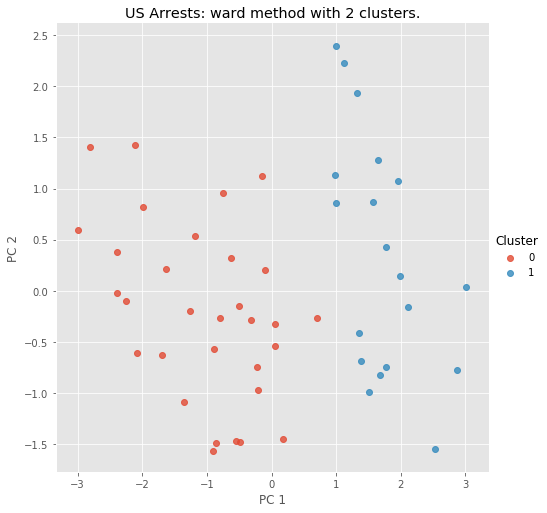

In [41]:
hierarchical_clustering('ward', principalDf1, principalComponents1)

In [42]:
def kmeans_clustering(data, components, std):
    kmeans1 = KMeans(n_clusters=2, max_iter=400,
                     random_state=7, algorithm='auto')
    kmeans1.fit(data)
    kmeans1.predict(data)
    data['Cluster'] = kmeans1.labels_
    print('Cluster Value Count:\n' + str(data['Cluster'].value_counts()));
    print(data)
    sns.lmplot(data=data, x='PC 1', y='PC 2', hue='Cluster',
               fit_reg=False, legend=True, legend_out=True, height=7)
    plt.title('US Arrests with 2 Clusters - ' + std)
    print('\nSilhouette Score: ' + str(metrics.silhouette_score(components,
                                   kmeans1.labels_, metric='euclidean')))

# K-Means Clustering

In K-means clustering I have taken the approach of feeding the algorithm standardized and non-standardized data. The results once again similar to the hierarchical clustering algorithm with one or two states here and there clustered to a different cluster. This is due to the inner workings of the different algorithms and in the last model, the non-standardized data fed to the k-means algorithm. One noticable difference that I want to point out is the difference in Silhoutte Score from Standardized to Non-Standardized data which is 0.47580 and 0.60000 respectively. I suppose both are acceptable but one must ask whether we could do this problem with Non-Standardized data only.

1. K-Means Clustering - Standardized

Cluster Value Count:
0    30
1    20
Name: Cluster, dtype: int64
                    PC 1      PC 2  Cluster
State                                      
Alabama         0.985566  1.133392        1
Alaska          1.950138  1.073213        1
Arizona         1.763164 -0.745957        1
Arkansas       -0.141420  1.119797        0
California      2.523980 -1.542934        1
Colorado        1.514563 -0.987555        1
Connecticut    -1.358647 -1.088928        0
Delaware        0.047709 -0.325359        0
Florida         3.013042  0.039229        1
Georgia         1.639283  1.278942        1
Hawaii         -0.912657 -1.570460        0
Idaho          -1.639800  0.210973        0
Illinois        1.378911 -0.681841        1
Indiana        -0.505461 -0.151563        0
Iowa           -2.253646 -0.104054        0
Kansas         -0.796881 -0.270165        0
Kentucky       -0.750859  0.958440        0
Louisiana       1.564818  0.871055        1
Maine          -2.396829  0.376392        0
Maryland   

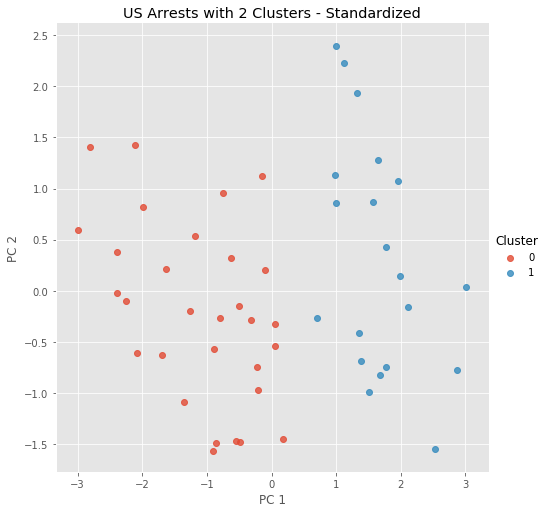

In [43]:
kmeans_clustering(principalDf1, principalComponents1, 'Standardized')

2. K-Means Clustering - Non-Standardized

Cluster Value Count:
0    29
1    21
Name: Cluster, dtype: int64
                      PC 1       PC 2  Cluster
State                                         
Alabama          64.802164  11.448007        1
Alaska           92.827450  17.982943        1
Arizona         124.068216  -8.830403        1
Arkansas         18.340035  16.703911        1
California      107.422953 -22.520070        1
Colorado         34.975986 -13.719584        1
Connecticut     -60.887282 -12.932530        0
Delaware         66.731025  -1.353798        1
Florida         165.244370  -6.274690        1
Georgia          40.535177   7.290240        1
Hawaii         -123.536106 -24.291208        0
Idaho           -51.797002   9.469191        0
Illinois         78.992097 -12.897060        1
Indiana         -57.550961  -2.846265        0
Iowa           -115.586790   3.342131        0
Kansas          -55.789694  -3.157234        0
Kentucky        -62.383181  10.673271        0
Louisiana        78.277631   4.294917     

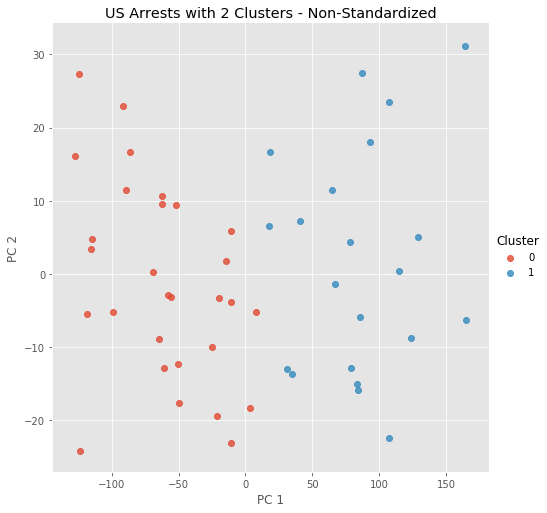

In [44]:
kmeans_clustering(principalDf, principalComponents, 'Non-Standardized')